# Лабораторная работа номер 6 
Предмет: Компьютерная геометрия
Студент: Подмогильный Иван Александрович


In [21]:
import numpy as np 
from matplotlib import pyplot as plt
from math import comb, factorial

# Задание №1
Написать функцию, которая вычисляет значения полинома Бернштейна 𝐵𝑖
𝑛(𝑡) для заданных параметров 𝑖, 𝑛 и 𝑡.   
Сколько полиномов существует при 𝑛 = 1, 2, 3, 4, 5, 6?  
Постройте их графики и
сверьте с картинками из презентации.

In [22]:
def bernstein(n, i, t):
    return comb(n, i) * (1 - t)**(n - i) * t**i 

# Let's create the same function with the other name, so it's convinient for the user to call the function 
# whatever he wants. 
def B(n, i, t):
    return comb(n, i) * (1 - t)**(n - i) * t**i 

In [23]:
# Напишем код, который даёт некоторую степень обобщения. Достаточно изменить лишь значение n, 
# чтобы увидеть разные функции

def draw_berns(n, figsize=None):
    size = figsize if figsize is not None else (10, 10)
    assert type(size) == tuple, "Sorry, parameter figsize accepts only tuple, example (10, 10)"
    
    t = np.linspace(0, 1, 400)
    fig = plt.figure(figsize=(size))
    ax = fig.add_subplot(1, 1, 1)

    res = []
    
    # Для каждого n соберём полином
    for i in range(n+1):
        berns = np.array([])
        for ti in t: 
            berns = np.append(berns, B(n, i, ti))
        res.append(berns)

    for b in res:
        ax.plot(t, b)

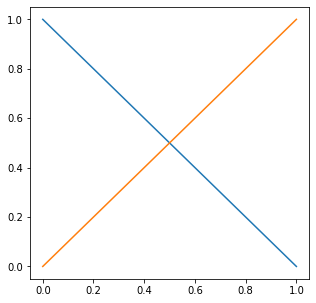

In [24]:
draw_berns(1, figsize=(5, 5))

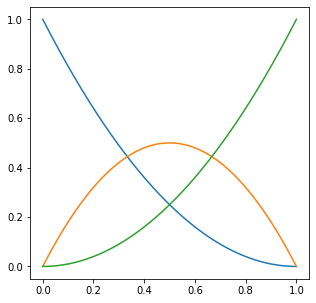

In [25]:
draw_berns(2, figsize=(5, 5))

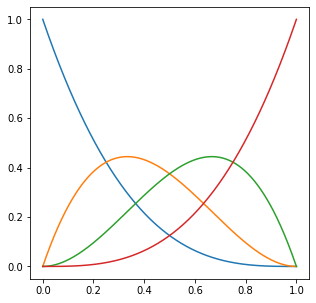

In [26]:
draw_berns(3, figsize=(5, 5))

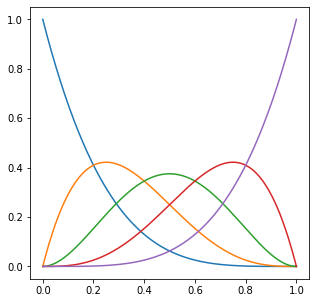

In [27]:
draw_berns(4, figsize=(5, 5))

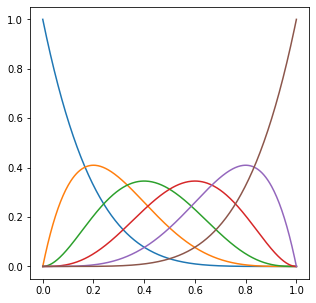

In [28]:
draw_berns(5, figsize=(5, 5))

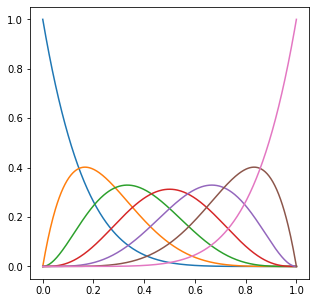

In [29]:
draw_berns(6, figsize=(5, 5))

# Задание 2
Напишите программу, которая вычисляет точки кривой Безье любого порядка с помощью полиномов Бернштейна.  
Порядок кривой должен вычисляться автоматически на основе количества
точек, которые используются для построения.  
Сверьте результаты работы программы с таблицей 5
и с рисунком 21.  
Координаты точек: (1, 1), (2, 2), (4, 2), (5, 1), (2, 0), (1, 1).

In [30]:
points = np.array([(1, 1), (2, 2), (4, 2), (5, 1), (2, 0), (1, 1)])

# Let's modify a bit function draw_berns. We will need it in the ex.2
def berns_functions(n, figsize=None, fragm=400):
    size = figsize if figsize is not None else (10, 10)
    assert type(size) == tuple, "Sorry, parameter figsize accepts only tuple, example (10, 10)"
    
    t = np.linspace(0, 1, fragm)

    list_of_berns_polynoms = []
    
    # Для каждого n соберём полином
    for i in range(n+1):
        berns = np.array([])
        for ti in t: 
            berns = np.append(berns, B(n, i, ti))
        list_of_berns_polynoms.append(berns)
    
    return list_of_berns_polynoms

In [103]:
def bezier(points):
    n = len(points)
    fragm = 400
    functions = berns_functions(n-1, fragm=400)
    # print(len(functions))
    
    spline = np.zeros((fragm, 2))
    expanded_points = np.ones((fragm, 2))
    
    for i in range(n):
#         print(functions[i].shape)
#         print(points[i].shape)
#         print(functions[i])
#         print(points[i])
        
        points_i = expanded_points * points[i]
        spline += (functions[i] * points_i.T).T
        
    
    return spline

In [104]:
%%timeit
# Получим значения
spline = bezier(points)

24.3 ms ± 3.17 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


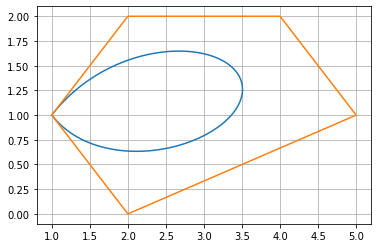

In [105]:
# Нарисуем кривую
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(spline[:, 0], spline[:, 1])
ax.grid()
ax.plot(points[:, 0], points[:, 1])

In [34]:
# Numpy умеет перемножать не до конца определенные умножения массивов только по строкам, не по столбцам. 
# Вот пример, поиграйтесь.
a = np.array([1, 2, 3, 4, 5])
b = np.ones((5, 2))

a * b.T

array([[1., 2., 3., 4., 5.],
       [1., 2., 3., 4., 5.]])

# Задание 3
Для кривых 𝐵(2, 𝑡), 𝐵(3, 𝑡), 𝐵(4, 𝑡) используйте матричные формулы.  
Сравните быстродействие универсальной функции из задания №2 с матричным вариантом (естественно для 𝑛 = 2, 3, 4).

In [118]:
def B2(t, points):
    """
    t: the whole set of t. put it here after defining t = np.linspace(0, 1, num)
    """
    assert len(points) == 3, f"Fatal error. You entered {len(points)} points, but only 3 accepted."
    assert type(points) == np.ndarray, f"Fatal error. Points are not a np.array"
    
    x = np.array([t**2, t, np.ones(len(t))])
    m = np.array([[1, -2, 1], [-2, 2, 0], [1, 0, 0]])
    
    return x.T @ m @ points

def B3(t, points):
    """
    t: the whole set of t. put it here after defining t = np.linspace(0, 1, num)
    return: np.array of shape (len(t), 2)
    """
    assert len(points) == 4, f"Fatal error. You entered {len(points)} points, but only 3 accepted."
    assert type(points) == np.ndarray, f"Fatal error. Points are not a np.array"
    
    x = np.array([t**3, t**2, t, np.ones(len(t))])
    m = np.array([[-1, 3, -3, 1], [3, -6, 3, 0], [-3, 3, 0, 0], [1, 0, 0, 0]])
    
    return x.T @ m @ points


def B4(t, points):
    """
    t: the whole set of t. put it here after defining t = np.linspace(0, 1, num)
    return: np.array of shape (len(t), 2)
    """
    assert len(points) == 5, f"Fatal error. You entered {len(points)} points, but only 3 accepted."
    assert type(points) == np.ndarray, f"Fatal error. Points are not a np.array"
    
    x = np.array( [t**4, t**3, t**2, t, np.ones(len(t))] )
    m = np.array([ [-1, -4, 6, -4, 1], [-4, 12, -12, 4, 0], [6, -12, 6, 0, 0], [-4, -4, 0, 0, 0], [1, 0, 0, 0, 0] ])
    
    return x.T @ m @ points


# Let's modify a bit berns_functions
def b4_functions(p, figsize=None, fragm=400):
    """
    p: 2d points
    return: 2d array of points of the curve
    """
    size = figsize if figsize is not None else (10, 10)
    assert type(size) == tuple, "Sorry, parameter figsize accepts only tuple, example (10, 10)"
    
    n = len(p)
    t = np.linspace(0, 1, fragm)

    list_of_berns_polynoms = []
    
    # Для каждого n соберём полином
    for i in range(2):
        berns = np.array([])
        for ti in t: 
            berns = np.append(berns, B(n, i, ti))
        # Так как numpy не понимает нотацию berns * points[0], перепишем это в следющем виде ...
        list_of_berns_polynoms.append( (berns * (np.ones((fragm, 2)) * points[0]).T).T )
    
    list_of_berns_polynoms.append(B2(t, p[:3]))
    list_of_berns_polynoms.append(B3(t, p[:4]))
    list_of_berns_polynoms.append(B4(t, p[:5]))
    
    curve = np.zeros((fragm, 2))
    
    for i in range(len(list_of_berns_polynoms)):
        print("p[i] is: ", p[i])
        curve += list_of_berns_polynoms[i] * p[i]
    
    return curve

In [94]:
%%timeit
# Получим значения
curve = b4_functions(np.array(points))

7.74 ms ± 238 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [119]:
# TODO: FIX THE B4_FUNCTIONS.
curve = b4_functions(np.array(points))

p[i] is:  [1 1]
p[i] is:  [2 2]
p[i] is:  [4 2]
p[i] is:  [5 1]
p[i] is:  [2 0]


In [120]:
curve.shape

(400, 2)

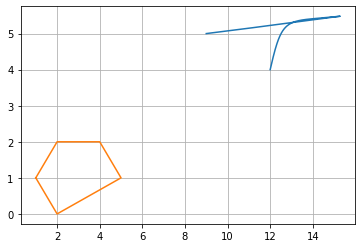

In [121]:
# Нарисуем кривую
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(curve[:, 0], curve[:, 1])
ax.grid()
ax.plot(points[:, 0], points[:, 1])

## Результаты замера по времени
Для универсальной функции время работы: 35.8 ms, а для функции с использованием константных матриц время работы составило 11 ms


# Задание №4
Реализуйте построение кривой Безье по алгоритму де Кастельжо. Нарисуйте опорные ломанные,
точки на которых вычисляет алгоритм де Кастельжо.

In [122]:
def de_casteljaus(p, figsize=None, fragm=400):
    n = len(p)
    t = np.linspace(0, 1, fragm)
    all_berns = []
    current_berns = []
    
    first_row = p
#     first_row = []
#     for i in range(n):
#         first_row.append(B(0, i, t))
    
    current_berns = first_row
    all_berns.append(current_berns)
    for k in range(1, n):
        # print("berns before assignment", current_berns)
        tmp = []
        for i in range(n-k):
            curr_b = (1 - t) * (np.ones((fragm, 2)) * current_berns[i].T).T + \
                                    t * (np.ones((fragm, 2)) * current_berns[i+1].T).T
            tmp.append(curr_b)
        current_berns = tmp
        # print("berns after assignment", current_berns)
        all_berns.append(current_berns)
    
    # current_berns is a list, which consists only of 1 np.array
    return current_berns[0].T, all_berns

In [88]:
%%timeit
# Получим значения
_, _ = de_casteljaus(np.array(points))

474 µs ± 15.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [123]:
curve, all_berns = de_casteljaus(np.array(points))

In [135]:
len(all_berns[1])

5

In [130]:
all_berns[1][1].shape

(2, 400)

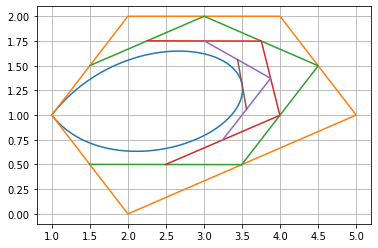

In [138]:
# Нарисуем кривую
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(curve[:, 0], curve[:, 1])
ax.grid()
ax.plot(points[:, 0], points[:, 1])

# Нарисуем опорные ломанные
mid = len(curve) // 2
for i in range(1, len(all_berns)):
    x = []
    y = []
    for j in range(len(all_berns[i])):
        x.append(all_berns[i][j].T[mid, 0])
        y.append(all_berns[i][j].T[mid, 1])
        
    ax.plot(x, y)

# Задание №5
Сделайте анимацию движения опорных ломанных из алгоритма де Кастельжо

Комментарий студента: для того, чтобы сделать анимацию, достаточно взять не одну точку mid из предыдущего задания, а нарисовать все точки (от 0 до 400) и анимировать это. Либо с помощью matplotlib.Animations, либо сохраняя всё в много кадров, а затем используя ffmpeg для создания ролика. Я буду использовать второе. 

In [142]:
import matplotlib.patches as mpatches
import subprocess
import os

In [150]:
# укажем директорию, в которую будем 
# сохранять сгенерированные картинки
FOLDER = 'polyline'
try:
    os.mkdir(FOLDER)
except FileExistsError:
    pass

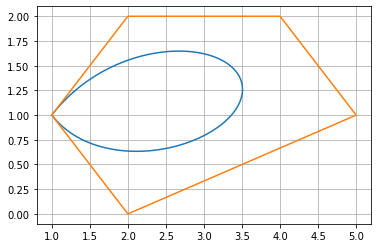

In [157]:
# Нарисуем кривую
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(curve[:, 0], curve[:, 1])
ax.grid()
ax.plot(points[:, 0], points[:, 1])

# TODO: Перестроить цикл так, чтобы все ломанные рисовались одновременно.
# Нарисуем опорные ломанные

colors = { 1 : "green", 2 : "cyan", 3 : "brown", 4 : "gold", 5 : "red", 6: "pink", 7 : "purple" }

for k in range(len(curve)):
    x = []
    y = []
    for i in range(1, len(all_berns)):
        for j in range(len(all_berns[i])):
            x.append(all_berns[i][j].T[k, 0])
            y.append(all_berns[i][j].T[k, 1])
        
        line = mpatches.Polygon(np.array([x, y]).T, closed=False, fill=False, color=colors[i])
        ax.add_patch(line)
        
    fig.savefig(f'{FOLDER}/{k:03d}.png', dpi=300, format='png')
    del ax.patches[:]
                                  

In [158]:
# FFMPEG = 'G:\\Program Files\\ffmpeg\\bin\\ffmpeg.exe'
FFMPEG = 'ffmpeg'

CMD = [FFMPEG, '-y', '-r', '30', '-f', 'image2', '-i', f'{FOLDER}/%03d.png',
       '-vcodec', 'libx264', '-crf', '25', '-pix_fmt', 'yuv420p', 'cycloid.mp4']
print(' '.join(CMD))
subprocess.run(CMD)

ffmpeg -y -r 30 -f image2 -i polyline/%03d.png -vcodec libx264 -crf 25 -pix_fmt yuv420p cycloid.mp4


ffmpeg version 4.2.4-1ubuntu0.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.3.0-10ubuntu2)
  configuration: --prefix=/usr --extra-version=1ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-l

CompletedProcess(args=['ffmpeg', '-y', '-r', '30', '-f', 'image2', '-i', 'polyline/%03d.png', '-vcodec', 'libx264', '-crf', '25', '-pix_fmt', 'yuv420p', 'cycloid.mp4'], returncode=0)